In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme() # Apply the default theme

# ***A. THU THẬP DỮ LIỆU***

## **1. Ngữ cảnh, câu chuyện gì khiến nhóm sinh viên thực hiện việc tìm kiếm dữ liệu?**

Trong đời sống hiện đại, sức khỏe là một trong những khía cạnh được con người quan tâm nhiều nhất. Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ 2 trên toàn cầu, chiếm khoảng 11% tổng số ca tử vong. Vì vậy, nhóm 15 quyết định tìm hiểu dữ liệu về các yếu tố và hành vi trong cuộc sống có thể dẫn đến nguy cơ đột quỵ.

## **2. Dữ liệu mà nhóm sinh viên là về chủ đề gì và lấy từ nguồn nào?**

* Dữ liệu nhóm cung cấp về chủ đề Các yếu tố và thói quen sinh hoạt của bệnh nhân có thể dẫn đến nguy cơ đột quỵ. Dữ liệu này được sử dụng để dự đoán, xác định xem một bệnh nhân có khả năng bị đột quỵ hay không dựa vào các yếu tố như giới tính, độ tuổi, bệnh cao huyết áp, tình trạng bệnh tim, tình trạng kết hôn, tính chất công việc, môi trường sinh sống, chỉ số đường huyết, chỉ số BMI, tình trạng hút thuốc của bệnh nhân.
* Nguồn: Stroke Prediction Dataset từ Kaggle, https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## **3. Người ta có cho phép sử dụng dữ liệu như thế này hay không?**

Người cung cấp dataset cho phép sử dụng dữ liệu với mục đích giáo dục. Trong phần Acknowledgements có chú thích: (Confidential Source) - Use only for educational purposes.

## **4. Người ta đã thu thập dữ liệu này như thế nào? Phương pháp thực hiện là gì?**

* Về vấn đề cách thức thu thập dữ liệu, Dataset Creator đã công bố trên Kaggle Discussion, về vấn đề bảo mật quyền riêng tư, các nguồn thông tin và phương pháp thu thập dữ liệu trong dataset chỉ được lưu hành nội bộ.
* Link bài đăng của Dataset Creator: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/discussion/237113

# ***B. KHÁM PHÁ DỮ LIỆU***

## **1. Đọc dữ liệu và một số thông tin phổ biến**

In [3]:
patient_df = pd.read_csv('healthcare_dataset_stroke.csv', index_col='id')
patient_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


* Số dòng và cột của dataset

In [4]:
n_rows, n_cols = patient_df.shape
print(f"Number of rows: {n_rows}")
print(f"Number of columns: {n_cols}")

Number of rows: 5110
Number of columns: 11


* Kiểm tra xem dữ liệu có bị lặp hay không?

In [5]:
is_duplicate_rows = patient_df.duplicated().any()
is_duplicate_rows

False

## **2. Khám phá dữ liệu**

### *2.1. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?*

* Theo mô tả dữ liệu và quan sát sơ bộ Stroke Prediction Dataset, một dòng cho biết các thông tin về yếu tố và thói quen, hành vi có nguy cơ dẫn đến đột quỵ của một bệnh nhân. 
* Không có vấn đề các dòng có ý nghĩa khác nhau.

### *2.2. Mỗi cột có ý nghĩa gì?*

Ý nghĩa từng cột:
* **id**: mã định danh từng bệnh nhân, mỗi bệnh nhân có một mã định danh riêng.
* **gender**: giới tính của bệnh nhân, gồm 3 loại: 'Male', 'Female' và 'Other'.
* **age**: tuổi của từng bệnh nhân.
* **hypertension**: tình trạng bệnh cao huyết áp của bệnh nhân, gồm 2 loại: '0' nếu bệnh nhân không bị cao huyết áp và '1' nếu bệnh nhân có bệnh cao huyết áp.
* **heart_disease**: tình trạng bệnh tim của bệnh nhân, gồm 2 loại: '0' nếu bệnh nhân không bị bệnh tim và '1' nếu bệnh nhân có bệnh tim.
* **ever_married**: tình trạng kết hôn, gồm 2 loại: 'No' nếu bệnh nhân chưa từng kết hôn và 'Yes' nếu bệnh nhân đang hoặc đã từng kết hôn.
* **work_type**: loại công việc mà bệnh nhân đang làm, gồm 5 loại: 'Private', 'Self-employed', 'Govt_job', 'children' và 'Never_worked'.
* **Residence_type**: loại môi trường bệnh nhân sinh sống, gồm 2 loại: 'Rural' và 'Urban'.
* **avg_glucose_level**: chỉ số đường huyết của từng bệnh nhân.
* **bmi**: chỉ số Body Mass Index (BMI) của từng bệnh nhân.
* **smoking_status**: tình trạng hút thuốc của bệnh nhân, gồm 4 loại: 'formerly smoked', 'never smoked', 'smokes' và 'Unknown'.
* **stroke**: tình trạng bệnh nhân đã từng bị đột quỵ hay không, gồm 2 loại: '0' nếu bệnh nhân không bị đột quỵ và '1' nếu bệnh nhân từng bị đột quỵ.

### *2.3. Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?*

In [6]:
col_dtypes = patient_df.dtypes
col_dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

##### *Kiểm tra xem có cột nào có kiểu dữ liệu chưa phù hợp không?*
* Các cột `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status` đều có dtype là object, thường ám chỉ kiểu chuỗi. Để kiểm tra được kiểu dữ liệu thật sự của các phần tử trong cột thì phải tiến hành truy xuất vào từng phần tử và dùng câu lệnh type để xem kiểu dữ liệu.

In [7]:
for i in range(len(patient_df)):
    assert type(patient_df['gender'].iloc[i]) == str
    assert type(patient_df['ever_married'].iloc[i]) == str
    assert type(patient_df['work_type'].iloc[i]) == str
    assert type(patient_df['Residence_type'].iloc[i]) == str
    assert type(patient_df['smoking_status'].iloc[i]) == str

* Như vậy, kiểu dữ liệu của các phần tử trong các cột `gender`, `ever_married`, `work_type`, `Residence_type`, `smoking_status` đều là kiểu chuỗi, nên phù hợp.
* Cột `id` có kiểu dữ liệu **int64** là phù hợp vì mã định danh của bệnh nhân đều ở dạng số nguyên. Còn các cột `hypertension`, `heart_disease`, `stroke` đều có dữ liệu dạng số là '0' và '1' nên kiểu dữ liệu **int64** là phù hợp.
* Các cột `age`, `avg_glucose_level`, `bmi` đều là những chỉ số, có thể không phải ở dạng số nguyên nên kiểu dữ liệu **float64** là phù hợp.

### *2.4. `Phân loại` các features dạng **Numerical** and **Categorical** và `sự phân bố` của các features*

#### 2.4.1. Phân loại

* Categorical: `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`
  * Nominal: `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`, `stroke`
  * Ordinal: không có dữ liệu được phân loại theo Ordinal.
* Numerical: `age`, `avg_glucose_level`, `bmi`
  * Discrete: không có dữ liệu được phân loại theo Discrete.
  * Continuous: `age`, `avg_glucose_level`, `bmi`

* Theo như data dictionary, nếu mà bệnh nhân được đánh dấu là 1, thì người ấy bị đột quỵ. Rõ ràng, số 0 hay 1 là một cái cờ hiệu để biết rằng bệnh nhân đó có bị đột quỵ hay không. Đúng, kiểu dữ liệu của column 'Stroke' là int64, điều này là nó thuộc loại số. Tuy nhiên, ta có thể thay đổi với những dòng lệnh sau.

In [8]:
patient_df['stroke'] = patient_df['stroke'].astype('category')

In [9]:
patient_df['stroke'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [10]:
num_features = ['age', 'avg_glucose_level', 'bmi']
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

features = num_features + cat_features
print(features)

['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


* Chuyển những đặc trưng thuộc Categorical mà ta đã phân tích ở trên về đúng kiểu `category`

In [11]:
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_cat(patient_df, cat_features)   

In [12]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   category
dtypes: category(8), float64(3)
memory usage: 200.8 KB


#### 2.4.2. Sự phân tán của các đặc trưng

##### `Distribution of Numerical feature values across the samples`

In [13]:
patient_df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


* Column 'bmi' có chứa giá trị null. Mình sẽ xử lý ở bước EDA
* Nhìn vào các giá trị min, std và max của 3 đặc trưng. Ta thấy có xuất hiện giá trị ngoại lai

##### `Distribution of Categorical feature values across the samples`

In [14]:
patient_df.describe(include='category')

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


##### **Biến mục tiêu: Stroke**

In [15]:
stroke_df = patient_df['stroke'].value_counts().to_frame()

In [16]:
patient_df['stroke'].value_counts(normalize=True).to_frame()

,stroke
0,0.951272
1,0.048728


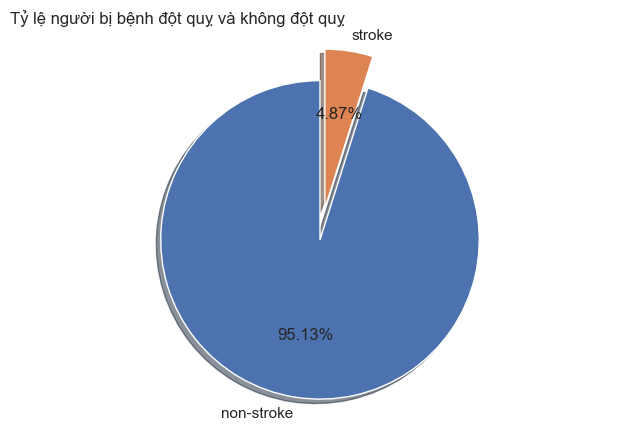

In [17]:
sizes = np.asarray(stroke_df).flatten()
labels = 'non-stroke', 'stroke'
explode = (0, 0.2)

fig,ax = plt.subplots(figsize=(8,5))

ax.pie(sizes, explode=explode, labels=labels,
        autopct='%1.2f%%',
        shadow=True, startangle=90)

ax.axis('equal')
ax.set_title(label="Tỷ lệ người bị bệnh đột quỵ và không đột quỵ", loc='left');

Dữ liệu mà ta đang trực quan có 4.87% người bị mắc bệnh đột quỵ.

### *2.5. Feature Engineering and Data Wrangling (Data pre-processing)*

* Tiền xử lý Feature `BMI`

In [18]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Column {col} has {missing_count/n_rows*100:.2f} % missing values.")

display_missing(patient_df, patient_df.columns)

Column bmi has 3.93 % missing values.


In [19]:
patient_df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

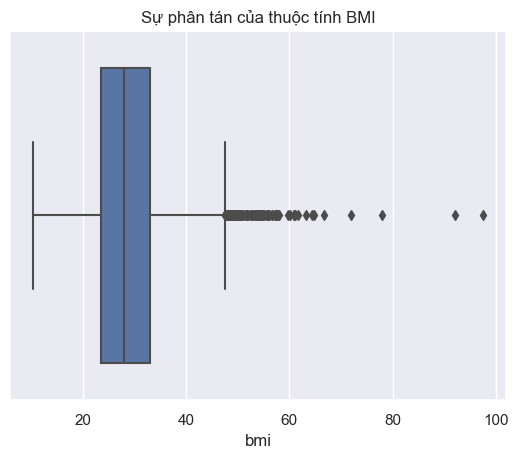

In [20]:
sns.boxplot(data=patient_df, x='bmi')
plt.title("Sự phân tán của thuộc tính BMI");

* Ta thấy giá trị mean = 28.89 và độ lệch chuẩn std = 7.85
* Tuy nhiên, giá trị max = 97.6. Xuất hiện giá trị ngoại lai. Vì vậy, ta không thể dùng fill null bằng chiến lược điền bằng mean vì có thể gây ra sai số nhiều.

* Chiến lược ta sẽ chọn 1 giá trị bmi `hợp lý` dựa vào feature `age`

`B1:` Ta nhóm các giá trị độ tuổi thành từng nhóm trẻ em (0-16), thanh niên (16-40), trung niên (40-65), cao tuổi (65-100)

In [21]:
patient_df['age_title'] = pd.cut(patient_df['age'], bins=[0,11,17,29,44,64,100], 
                                 labels=["Trẻ em", "Thiếu niên", "Thanh niên", "Người lớn", "Trung niên", "Cao tuổi"])

`B2:` Ta nhóm cột `Title` (theo loại độ tuổi) và tính giá trị `bmi` theo từng loại

In [22]:
bmi_by_gender_age = patient_df.groupby(['age_title']).median(numeric_only=True)['bmi'].to_frame()
bmi_by_gender_age

,bmi
age_title,
Trẻ em,18.4
Thiếu niên,23.5
Thanh niên,26.2
Người lớn,29.9
Trung niên,30.4
Cao tuổi,28.9


`B3:` Điền những giá trị `bmi` vào chỗ null sao cho hợp lý.

In [23]:
patient_df['bmi'] = patient_df.groupby(['age_title'])['bmi'].apply(lambda x: x.fillna(x.median()))

C:\Users\Hi There\AppData\Local\Temp\ipykernel_12876\1194631767.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  patient_df['bmi'] = patient_df.groupby(['age_title'])['bmi'].apply(lambda x: x.fillna(x.median()))


In [24]:
count = patient_df['bmi'].isna().sum()
print(f"Số lượng giá trị null của column bmi sau khi xử lý là: {count}")

Số lượng giá trị null của column bmi sau khi xử lý là: 0


**`Sau khi có xử lý các giá trị null ở column BMI`**
* `Ta phân loại BMI 5 mức độ béo phì theo WHO`
  - Thiếu cân: < 18.5
  - Cân đối: 18.5 - 24.9
  - Thừa cân: 25-29.9
  - Béo phì: 30-34.9
  - Béo phì nguy hiểm: >= 35

In [25]:
patient_df['bmi_title'] = pd.cut(patient_df['bmi'], bins=[0, 18.5, 25, 30, 35, 100], right=False,
                   labels=["Thiếu cân", "Cân đối", "Thừa cân", "Béo phì", "Béo phì nguy hiểm"])

In [26]:
patient_df.head()
# patient_df['bmi_title'] = patient_df.drop("bmi_title", axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_title,bmi_title
id,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Cao tuổi,Béo phì nguy hiểm
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1,Trung niên,Béo phì
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Cao tuổi,Béo phì
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Trung niên,Béo phì
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Cao tuổi,Cân đối


# ***C. KHÁM PHÁ MỐI QUAN HỆ TRONG DỮ LIỆU***

## **1. Correlating categorical features**
Categorical features: `stroke`, `gender`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `smoking_status`

### 1.1. `Gender: giới tính`

In [27]:
patient_df.groupby('gender')['stroke'].value_counts().to_frame()

stroke
gender stroke        
Female 0         2853
       1          141
Male   0         2007
       1          108
Other  0            1
       1            0

In [28]:
people_by_stroke = patient_df.loc[(patient_df.stroke == 1),('stroke','gender')]

Text(0, 0.5, 'Số lượng')

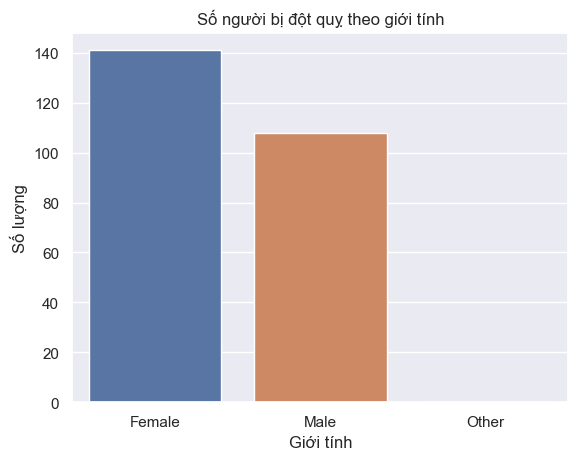

In [29]:
sns.countplot(data=people_by_stroke, x='gender')
plt.title("Số người bị đột quỵ theo giới tính")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")

* **Nhận xét:** 
  - Số lượng người bị đột quỵ xuất hiện nhiều ở giới tính nữ hơn là giới tính nam.
  - Không xuất hiện trường hợp bị đột quỵ ở người có giới tính khác nam và nữ.


### 1.2. `Hypertension: bệnh cao huyết áp ` 

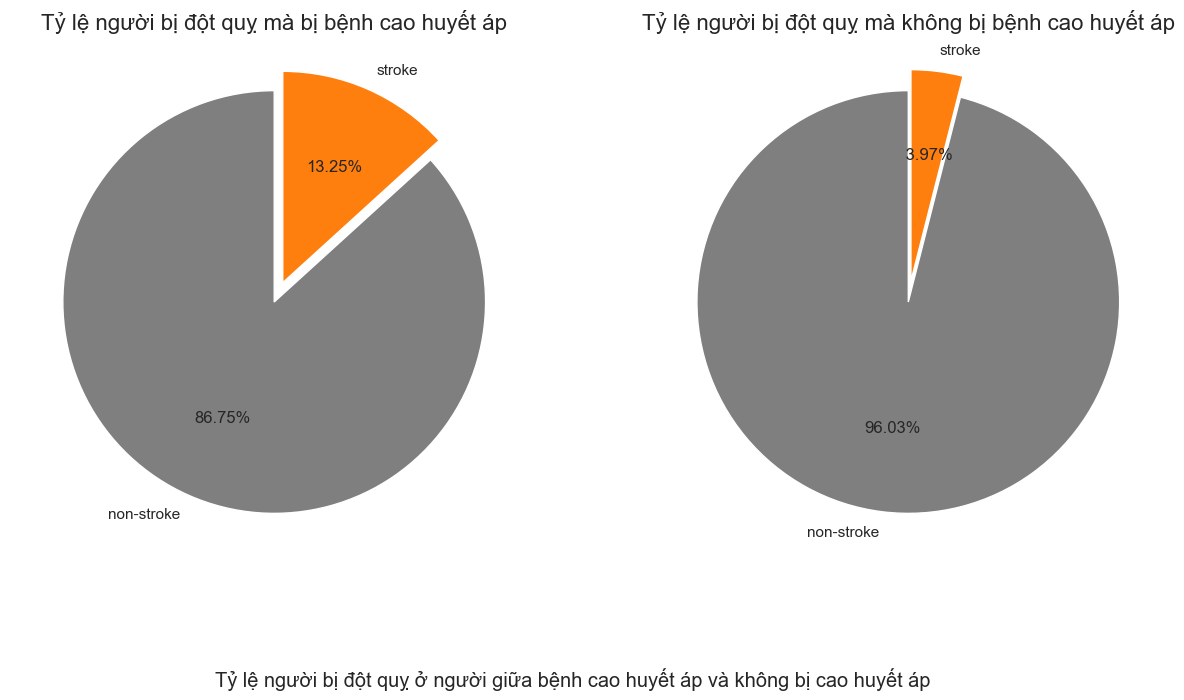

In [30]:
fig = plt.figure(figsize=(15,8))
fig.supxlabel('Tỷ lệ người bị đột quỵ ở người giữa bệnh cao huyết áp và không bị cao huyết áp')
labels = 'non-stroke', 'stroke'
explode = (0, 0.1)

hpt_df=patient_df.groupby(['hypertension'])

hpt1_df=hpt_df.get_group(1)
stroke_hpt1_df=hpt1_df['stroke'].value_counts()
sizes1= np.asarray(stroke_hpt1_df).flatten()

hpt0_df=hpt_df.get_group(0)
stroke_hpt0_df=hpt0_df['stroke'].value_counts()
sizes0 = np.asarray(stroke_hpt0_df).flatten()

ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(sizes1, explode=explode, labels=labels,autopct='%2.2f%%', startangle=90,colors=('tab:gray','tab:orange'))
plt.title('Tỷ lệ người bị đột quỵ mà bị bệnh cao huyết áp', fontsize=16)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(sizes0, explode=explode, labels=labels,autopct='%5.2f%%', startangle=90,colors=('tab:gray','tab:orange'))
plt.title('Tỷ lệ người bị đột quỵ mà không bị bệnh cao huyết áp', fontsize=16);

- Nhận xét:
  - Tỷ lệ đột quỵ ở những người có tiền sử cao huyết áp cao hơn gấp 3.33 lần so với người không có tiền sử cao huyết áp.
  - Chứng đột quỵ liên quan mật thiết đến bệnh cao huyết áp.

### 1.3. `Heart disease: bệnh tim mạch`

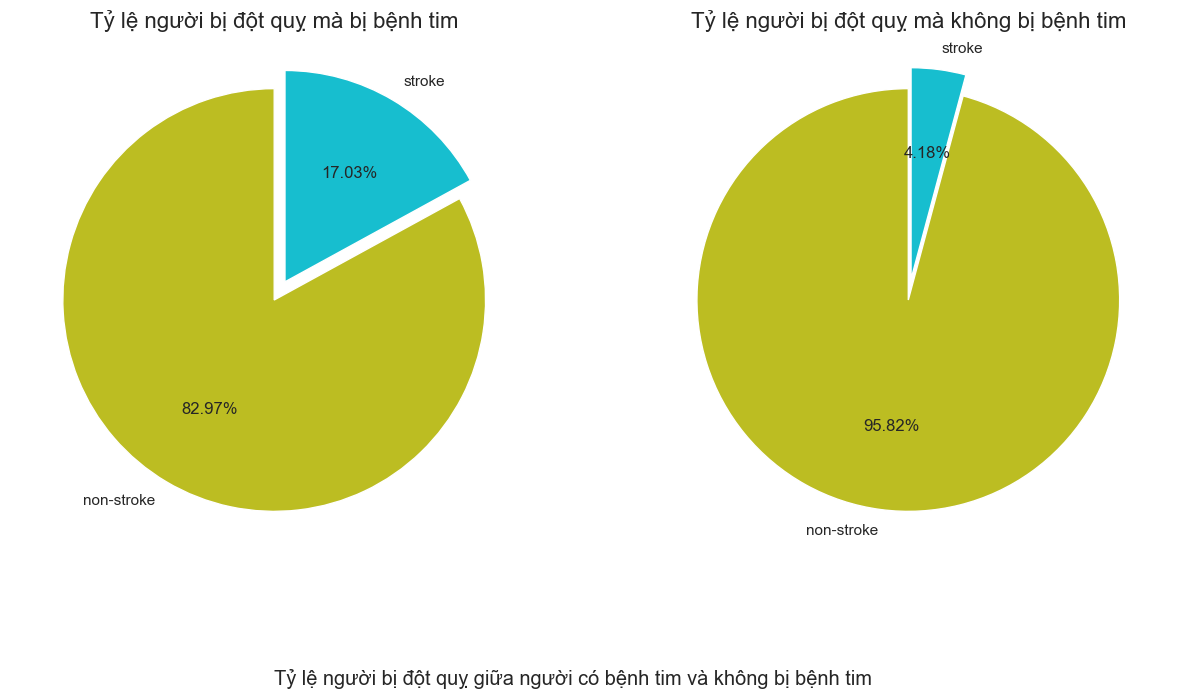

In [31]:
fig = plt.figure(figsize=(15,8))
fig.supxlabel('Tỷ lệ người bị đột quỵ giữa người có bệnh tim và không bị bệnh tim')
labels = 'non-stroke', 'stroke'
explode = (0, 0.1)
hds_df = patient_df.groupby(['heart_disease'])
hds1_df = hds_df.get_group(1)
stroke_hds1_df = hds1_df['stroke'].value_counts()
sizes1 = np.asarray(stroke_hds1_df).flatten()

hds0_df = hds_df.get_group(0)
stroke_hds0_df = hds0_df['stroke'].value_counts()
sizes0 = np.asarray(stroke_hds0_df).flatten()

ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(sizes1, explode=explode, labels=labels,autopct='%2.2f%%', startangle=90,colors=('tab:olive','tab:cyan'))
plt.title('Tỷ lệ người bị đột quỵ mà bị bệnh tim', fontsize=16)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.pie(sizes0, explode=explode, labels=labels,autopct='%2.2f%%', startangle=90,colors=('tab:olive','tab:cyan'))
plt.title('Tỷ lệ người bị đột quỵ mà không bị bệnh tim', fontsize=16);

- Nhận xét:
  - Tỷ lệ đột quỵ ở những người có bệnh nền tim mạch cao hơn gấp 4.07 lần so với người không mắc các bệnh tim mạch.
  - Các bệnh lý tim mạch là một trong những nguyên nhân chính yếu gây ra đột quỵ.

### 1.4. `Ever Married: tình trạng hôn nhân`

In [32]:
patient_df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

Text(0.5, 1.0, 'Số lượng người bị đột quỵ và không bị đột quỵ theo tình trạng hôn nhân')

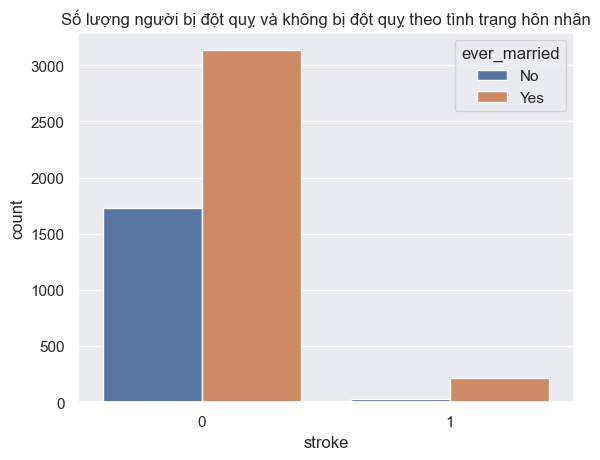

In [33]:
sns.countplot(data=patient_df, x='stroke', hue='ever_married').set_title('Số lượng người bị đột quỵ và không bị đột quỵ theo tình trạng hôn nhân')

- Bước 1: Ta lọc ra những người thuộc độ tuổi có thể kết hơn ra trước (Nữ >= 18, Nam >= 21). Nếu không chia thì trẻ em cũng tính như chưa kết hôn sẽ ta trực quan bị nghiêng.
- Bước 2: Trực quan trên dữ liệu này.

In [34]:
patient_df['gender'].unique()

['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']

In [35]:
male_age_able_got_married = patient_df.loc[((patient_df.age >= 18)& (patient_df.gender=="Female")) |
                                             ((patient_df.age >= 21)& (patient_df.gender=="Male"))]

In [37]:
male_age_able_got_married.groupby(['ever_married'])['stroke'].value_counts()

ever_married  stroke
No            0          806
              1           27
Yes           0         3131
              1          220
Name: stroke, dtype: int64

- Nhận xét:
    - Biểu đồ trên cho thấy có nhiều trường hợp đột quỵ hơn ở những người đã từng kết hôn so với những người chưa từng kết hôn.
    - Điều này cho thấy có thể có sự tương quan giữa tình trạng kết hôn so với tỷ lệ đột quỵ.
    - Những yếu tố có thể gây ra tình trạng trên như căng thẳng trong hôn nhân, thói quen, lối sống,...

#### `So sánh tỉ lệ người bị đột quỵ theo tình trạng hôn nhân Ever married`

Text(0.5, 0.01, 'Tỷ lệ người bị đột quỵ theo tình trạng hôn nhân')

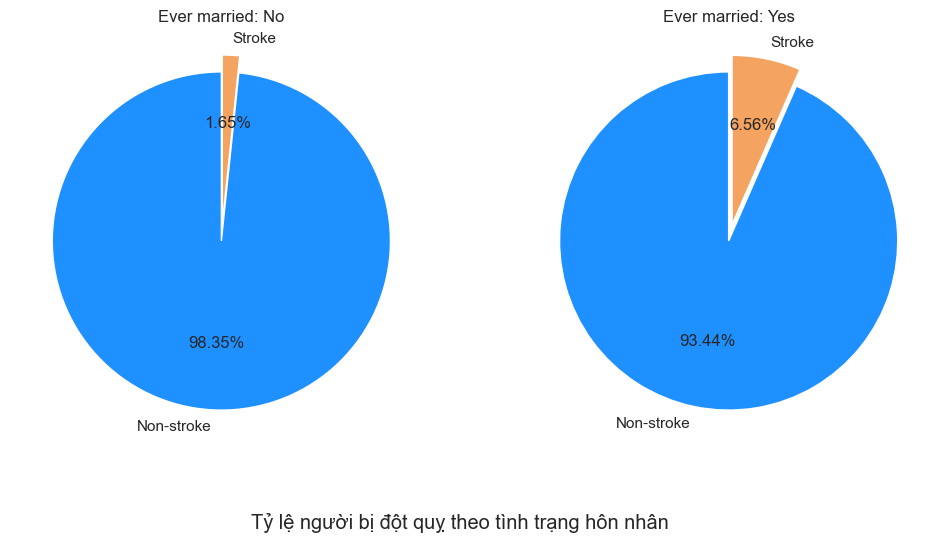

In [38]:
# gom nhóm các bệnh nhân theo tình trạng hôn nhân
m_grp = patient_df.groupby('ever_married')

# tạo figure
MS_fig, axes = plt.subplots(1, 2, figsize = (12, 6))
explode = (0, 0.1)
labels = 'Non-stroke', 'Stroke'
colors = 'dodgerblue', 'sandybrown'

nms = []
ms = []

for i, key in zip(range(0, len(m_grp.groups.keys())), m_grp.groups.keys()):
    nms.append(m_grp.get_group(key)['stroke'].value_counts()) # số lượng người bị đột quy theo tình trạng hôn nhân
    ms.append(np.asarray(nms[i]))
    # vẽ biểu đồ tròn thể hiện tỉ lệ số người bị đột quỵ theo tình trạng hôn nhân
    axes[i % 2].pie(ms[i], 
                            explode = explode, labels = labels, colors = colors, autopct = '%2.2f%%', startangle = 90)
    axes[i % 2].set_title(f"Ever married: {key}")

MS_fig.supxlabel('Tỷ lệ người bị đột quỵ theo tình trạng hôn nhân')

##### ***Liệu tình trạng hôn nhân có ảnh hưởng trực tiếp đến nguy cơ đột quỵ của bệnh nhân hay không?***
- Dựa vào quan sát 2 biểu đồ tròn trên:
  - Những bệnh nhân có tình trạng hôn nhân Ever married là 'No' có tỉ lệ bị đột quỵ là 1.65%.
  - Những bệnh nhân có tình trạng hôn nhân Ever married là 'Yes' có tỉ lệ bị đột quỵ khá cao, chiếm 6.56%, gấp khoảng 4 lần so với những người có tình trạng là 'No'.
- Như vậy, tình trạng hôn nhân có ảnh hưởng khá nhiều đến nguy cơ đột quỵ của bệnh nhân. Cụ thể, nếu bệnh nhân có tình trạng hôn nhân là 'Yes' thì sẽ có khả năng bị đột quỵ cao hơn nhiều lần so với những người có tình trạng hôn nhân là 'No'.

### 1.5. `Smoking status: hút thuốc`

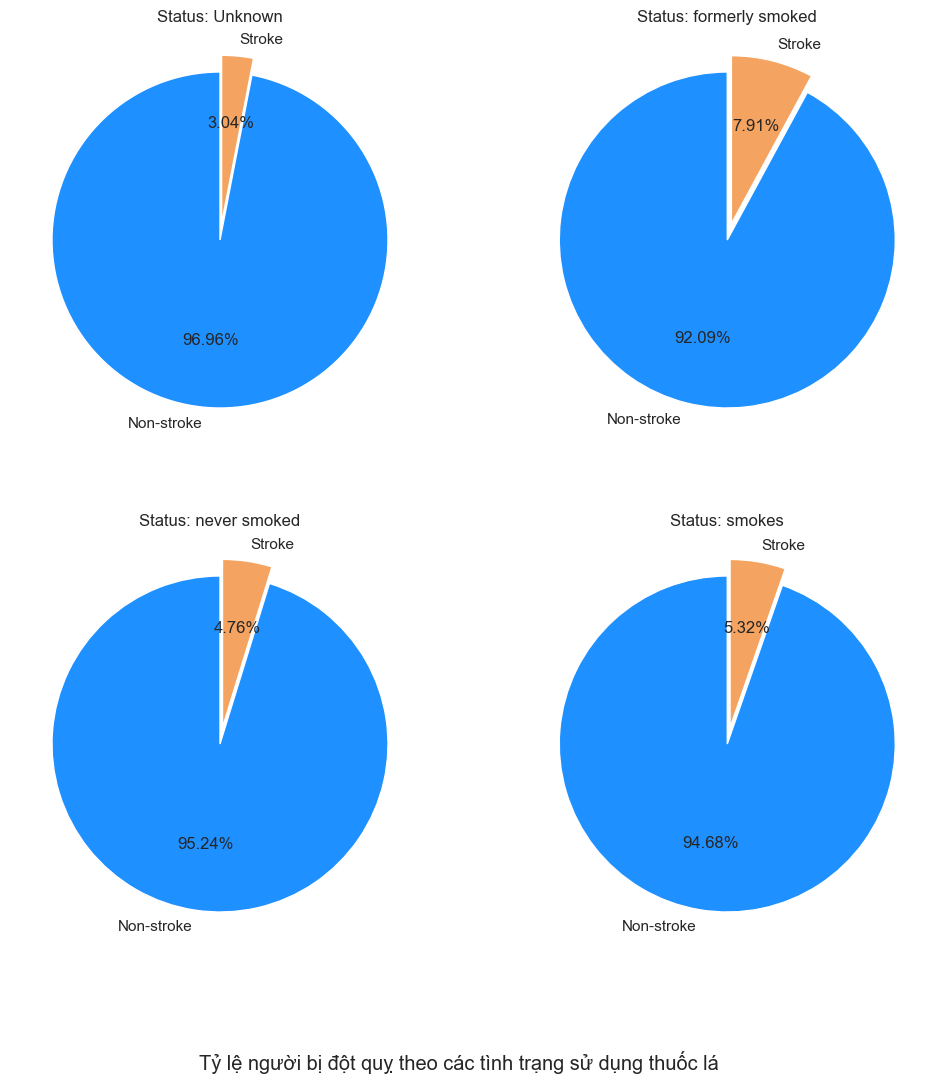

In [39]:
ss_grp = patient_df.groupby('smoking_status')

SS_fig, axes = plt.subplots(2, 2, figsize = (12, 12))
explode = (0, 0.1)
labels = 'Non-stroke', 'Stroke'
colors = 'dodgerblue', 'sandybrown'

ss = []

for i, key in zip(range(0, len(ss_grp.groups.keys())), ss_grp.groups.keys()):
    ss.append(np.asarray(ss_grp.get_group(key)['stroke'].value_counts()))
    axes[i // 2, i % 2].pie(ss[i], 
                            explode = explode, labels = labels, colors = colors, autopct = '%2.2f%%', startangle = 90)
    axes[i // 2, i % 2].set_title(f"Status: {key}")
SS_fig.supxlabel('Tỷ lệ người bị đột quỵ theo các tình trạng sử dụng thuốc lá');

- Nhận xét 4 biểu đồ tròn:
  - Trong 4 nhóm về tình trạng sử dụng thuốc lá, nhóm đã từng sử dụng có tỷ lệ đột quỵ rất cao với 7.91%, có thể là nhóm này bao gồm những người lớn tuổi và có thói quen hút thuốc thời gian trước.
  - Nhóm những người sử dụng thuốc lá có tỷ lệ đột quỵ tương đối cao, lên đến 5.32%.
  - Nhóm những người không sử dụng thuốc lá và nhóm không rõ tình trạng có tỷ lệ thấp hơn đáng kể, lần lượt có tỷ lệ đột quỵ là 4.76% và 3.04%.
- Qua 4 biểu đồ tròn về tình trạng sử dụng thuốc lá của các bệnh nhân đột quỵ, có thể kết luận rằng thuốc lá là một trong những nguyên nhân gây ra chứng đột quỵ, điều đó được chứng minh qua tỷ lệ các trường hợp đột quỵ xuất hiện ở những người có thói quen sử dụng thuốc lá hoặc có tiền sử sử dụng thuốc lá.

### 1.6. `Work-type: loại công việc`

Text(0.5, 0.01, 'Tỷ lệ người bị đột quỵ theo từng loại công việc')

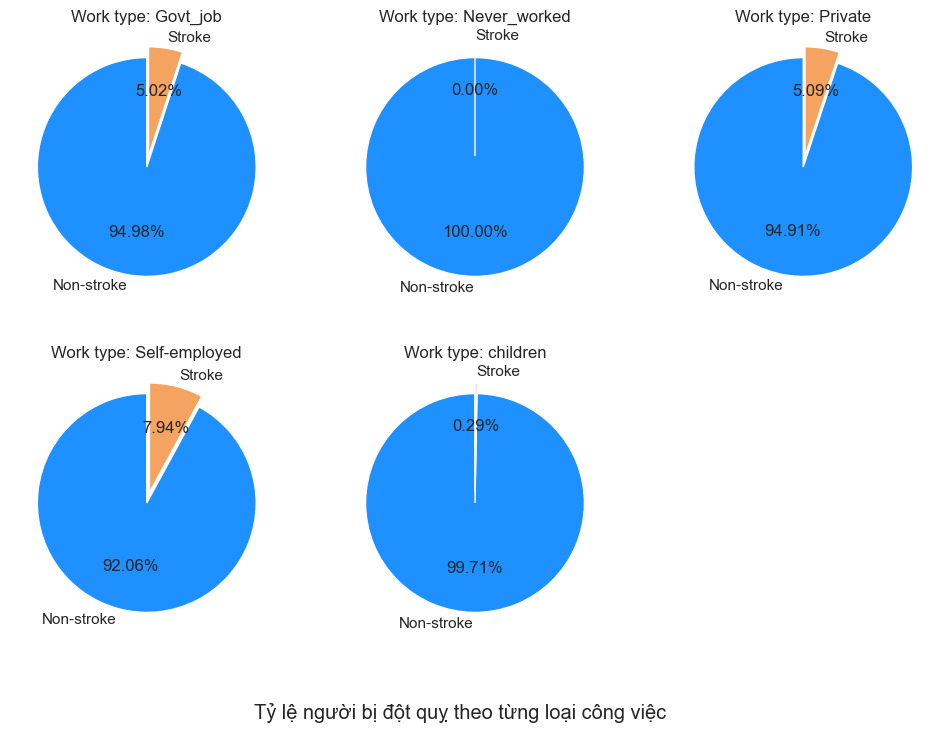

In [40]:
# gom nhóm các bệnh nhân theo từng loại công việc
w_grp = patient_df.groupby('work_type')

# tạo figure
WS_fig, axes = plt.subplots(2, 3, figsize = (12, 8))
explode = (0, 0.1)
labels = 'Non-stroke', 'Stroke'
colors = 'dodgerblue', 'sandybrown'

nws = []
ws = []

for i, key in zip(range(0, len(w_grp.groups.keys())), w_grp.groups.keys()):
    nws.append(w_grp.get_group(key)['stroke'].value_counts()) # số lượng người bị đột quy trong từng loại công việc
    ws.append(np.asarray(nws[i]))
    # vẽ biểu đồ tròn thể hiện tỉ lệ số người bị đột quỵ trong từng loại công việc
    axes[i // 3, i % 3].pie(ws[i], 
                            explode = explode, labels = labels, colors = colors, autopct = '%2.2f%%', startangle = 90)
    axes[i // 3, i % 3].set_title(f"Work type: {key}")

WS_fig.delaxes(axes[1, 2])
WS_fig.supxlabel('Tỷ lệ người bị đột quỵ theo từng loại công việc')

##### ***Liệu loại công việc có ảnh hưởng trực tiếp đến nguy cơ đột quỵ của bệnh nhân hay không?***
- Dựa vào quan sát 5 biểu đồ tròn trên:
  - Những bệnh nhân có loại công việc 'Govt_job', 'Private' và 'Self-employed' đều xuất hiện những trường hợp bị đột quỵ khá cao, có tỉ lệ cao hơn 5%, đặc biệt cao nhất là loại 'Self-employed' có tỉ lệ 7.94%.
  - Còn những bệnh nhân có loại công việc 'Never_worked' và 'children' đều ít xuất hiện những trường hợp bị đột quỵ, dưới 0.29%, đặc biệt thấp nhất là loại 'Never_worked', có tỉ lệ 0% bị đột quỵ.
- Như vậy, loại công việc có ảnh hưởng đến nguy cơ đột quỵ của bệnh nhân. Cụ thể, nếu bệnh nhân làm trong những loại công việc như 'Govt_job', 'Private', 'Self-employed' sẽ có nguy cơ đột quỵ khá cao, đặc biệt là 'Self-employed'. Ngược lại, nếu bệnh nhân làm trong những loại công việc như 'Never_worked' và 'children' thì khả năng bị đột quỵ của họ sẽ khá thấp, đặc biệt nếu như họ ở trong loại 'Never_worked'.

### 1.7. `Resident Type: Nơi sinh sống`

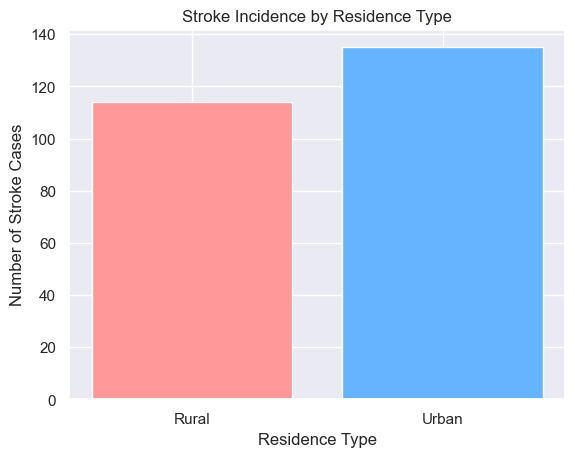

In [75]:
# Count the number of strokes and non-strokes by residence type
residence_stroke_counts = patient_df.groupby(['Residence_type', 'stroke']).size().reset_index(name='count')

# Filter out non-stroke cases
stroke_counts = residence_stroke_counts[residence_stroke_counts['stroke'] == 1]

# Create a bar chart
labels = stroke_counts['Residence_type']
values = stroke_counts['count']
colors = ['#ff9999','#66b3ff'] 
plt.bar(labels, values, color=colors)
plt.title('Stroke Incidence by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Number of Stroke Cases')
plt.show()

- Nhận xét:
    - Biểu đồ cột trên cho ta thấy có nhiều trường hợp đột quỵ ở thành thị(urban) so với nông thôn(rural)(gần 140 người ở urban so với gần 120 người ở rural). Điều này cho thấy mối tương quan giữa loại nơi cư trú và tỷ lệ đột quỵ(tỷ lệ đột quỵ ở thành thị cao hơn so với nông thôn).
    - Tuy nhiên, điều quan trọng cần lưu ý là đây chỉ là một mối tương quan và không nhất thiết ngụ ý quan hệ nhân quả.

## **2. Correlating numerical features**
Numerical features: `age`, `avg_glucose_level`, `bmi`

### 2.1. `Age: độ tuổi`

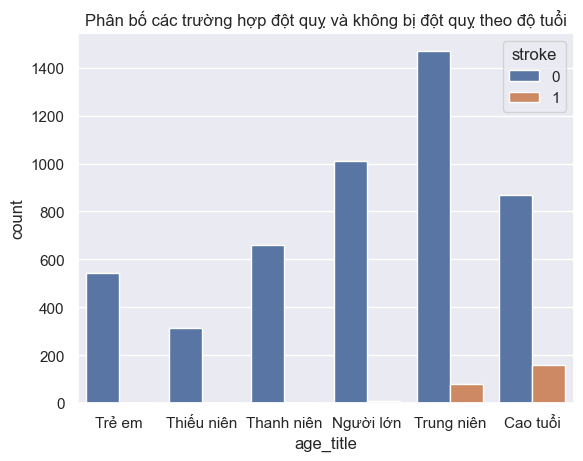

In [41]:
sns.countplot(data=patient_df, x='age_title', hue='stroke').set_title('Phân bố các trường hợp đột quỵ và không bị đột quỵ theo độ tuổi');

*  **Nhận xét:** Ta thấy ở độ tuổi trung niên và cao tuổi có khả năng mắc bệnh đột quỵ cao hơn những người thuộc độ tuổi còn lại. Vì vậy, những người ở độ tuổi trung niên và cao tuổi cần hết sức cẩn thận.

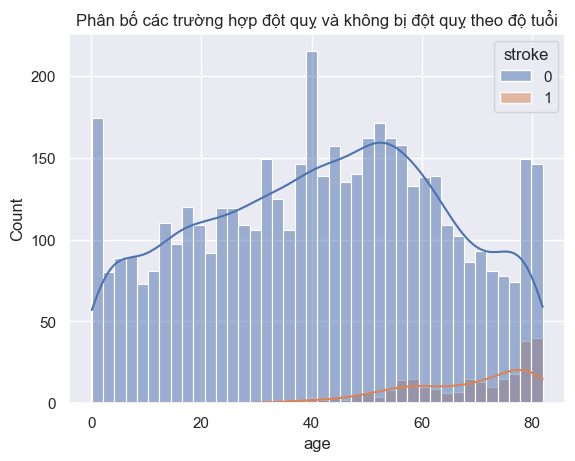

In [42]:
sns.histplot(data=patient_df, x='age', hue='stroke', bins=40, kde=True).set_title('Phân bố các trường hợp đột quỵ và không bị đột quỵ theo độ tuổi');

* Phân tích tỷ lệ người mắc bệnh đột quỵ ở độ tuổi từ 78 đến 82.

In [43]:
num_patient_78_82 = patient_df.loc[(patient_df.age >= 78) & (patient_df.age <= 82), 'stroke'].value_counts()
print(f"Tỷ lệ bệnh nhân ở độ tuổi từ 78 đến 82 mắc bệnh đột quỵ là:{num_patient_78_82[1] / num_patient_78_82.sum() * 100: .2f}%")

Tỷ lệ bệnh nhân ở độ tuổi từ 78 đến 82 mắc bệnh đột quỵ là: 20.91%


* **Nhận xét:** 
  - Bệnh đột quỵ có dấu hiệu xuất hiện ở tuổi 40 tuổi nhưng không quá nhiều.
  - Độ tuổi 56-60, người ở độ tuổi này có dấu hiệu bị đột quỵ cao hơn so với người có độ tuổi 40.
  - Từ 60-68 tuổi, mức độ đột quỵ không quá thay đổi nhiều.
  - Người từ 68 trở đi thì tỷ lệ người đột quỵ có dấu hiệu tăng rõ rõ rệt hơn so với độ tuổi 56-60.
  - Đỉnh điểm, người ở độ tuổi 78-82 có tỷ tỷ lệ bị mắc bệnh đột quỵ cực kỳ cao, `20.91%`. Chúng ta cần quan tâm cha mẹ hay ông bà nhiều hơn ở mức độ này.

### 2.2. `BMI: chỉ số BMI (Body Mass Index)` 

In [44]:
patient_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_title,bmi_title
id,,,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Cao tuổi,Béo phì nguy hiểm
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.4,never smoked,1,Trung niên,Béo phì
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Cao tuổi,Béo phì
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Trung niên,Béo phì
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Cao tuổi,Cân đối


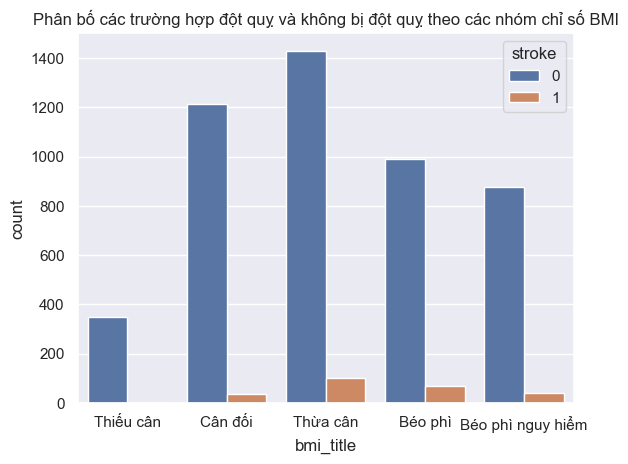

In [45]:
sns.countplot(data=patient_df, x='bmi_title', hue='stroke').set_title('Phân bố các trường hợp đột quỵ và không bị đột quỵ theo các nhóm chỉ số BMI');

* **Nhận xét dựa trên số lượng người bị đột quỵ giữa các mức độ BMI của bệnh nhân:** 
  - Người có chỉ số cơ thể ở mức `cân đối` thì vẫn có nguy cơ đột quỵ nhưng cũng không quá nhiều.
  - Tuy nhiên, những người thừa cân, béo phì và béo phì nguy hiểm cần phải cẩn thận với bệnh đột quỵ

#### `Làm rõ dựa trên tỉ lệ xuất hiện đột quỵ của từng Mức độ BMI`

Text(0.5, 0.01, 'Tỷ lệ người bị đột quỵ ở các nhóm chỉ số BMI')

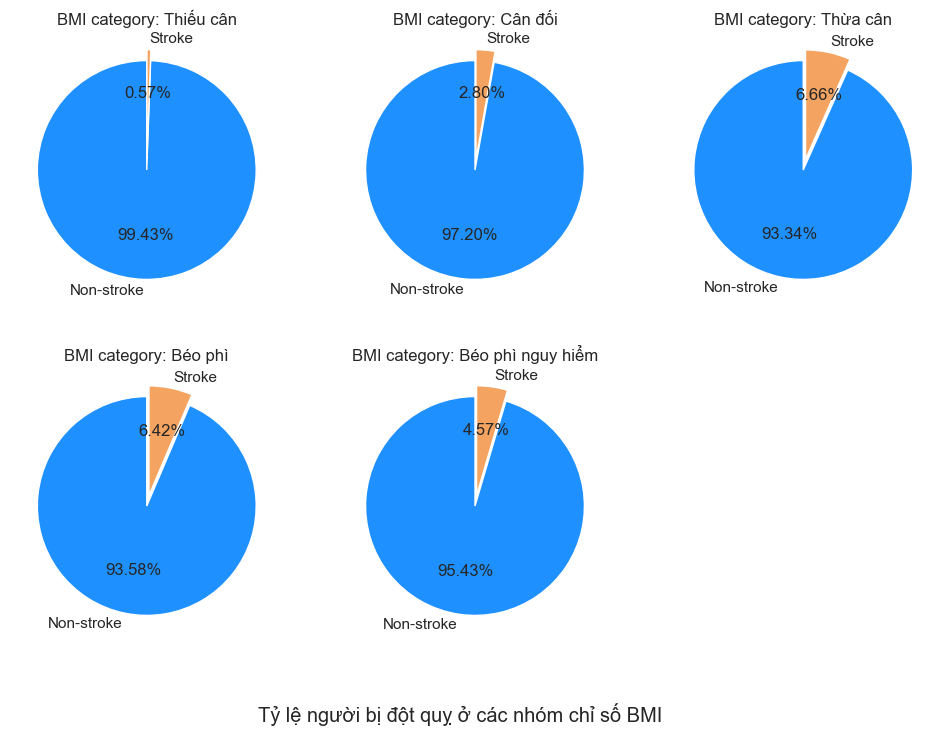

In [46]:
# gom nhóm các bệnh nhân theo mức độ BMI
bmi_grp = patient_df.groupby('bmi_title')

# tạo figure
BMIS_fig, axes = plt.subplots(2, 3, figsize = (12, 8))
explode = (0, 0.1)
labels = 'Non-stroke', 'Stroke'
colors = 'dodgerblue', 'sandybrown'

nbmis = []
bmis = []

for i, key in zip(range(0, len(bmi_grp.groups.keys())), bmi_grp.groups.keys()):
    nbmis.append(bmi_grp.get_group(key)['stroke'].value_counts()) # số lượng người bị đột quy theo mức độ béo phì
    bmis.append(np.asarray(nbmis[i]))
    # vẽ biểu đồ tròn thể hiện tỉ lệ số người bị đột quỵ theo mức độ béo phì
    axes[i // 3, i % 3].pie(bmis[i], 
                            explode = explode, labels = labels, colors = colors, autopct = '%2.2f%%', startangle = 90)
    axes[i // 3, i % 3].set_title(f"BMI category: {key}")

BMIS_fig.delaxes(axes[1, 2])
BMIS_fig.supxlabel('Tỷ lệ người bị đột quỵ ở các nhóm chỉ số BMI')

##### ***Liệu mức độ BMI có ảnh hưởng trực tiếp đến nguy cơ đột quỵ của bệnh nhân hay không?***
- Dựa vào quan sát 5 biểu đồ tròn trên:
  - Những bệnh nhân có mức độ BMI 'Thừa cân', 'Béo phì' và 'Béo phì nguy hiểm' đều xuất hiện những trường hợp bị đột quỵ khá cao, có tỉ lệ cao hơn 4.5%.
  - Những bệnh nhân có mức độ BMI 'Cân đối' xuất hiện những trường hợp bị đột quỵ trung bình, khoảng 2.8%.
  - Còn những bệnh nhân có mức độ BMI 'Thiếu cân' xuất hiện những trường hợp bị đột quỵ rất thấp, khoảng 0.57%.
- Như vậy, mức độ BMI có ảnh hưởng đến nguy cơ đột quỵ của bệnh nhân. Cụ thể, nếu bệnh nhân có mức độ BMI cao, ở trong mức 'Thừa cân', 'Béo phì' và 'Béo phì nguy hiểm' sẽ có nguy cơ đột quỵ khá cao. Ngược lại, nếu bệnh nhân có mức độ BMI là 'Cân đối' hay 'Thiếu cân' thì khả năng bị đột quỵ của họ sẽ khá thấp, đặc biệt nếu như họ ở trong mức 'Thiếu cân'.

### 2.3. `Avg_glucozo_level: mức độ glucozo trung bình trong máu (chỉ số đường huyết)` 

Text(0.5, 1.0, '0')

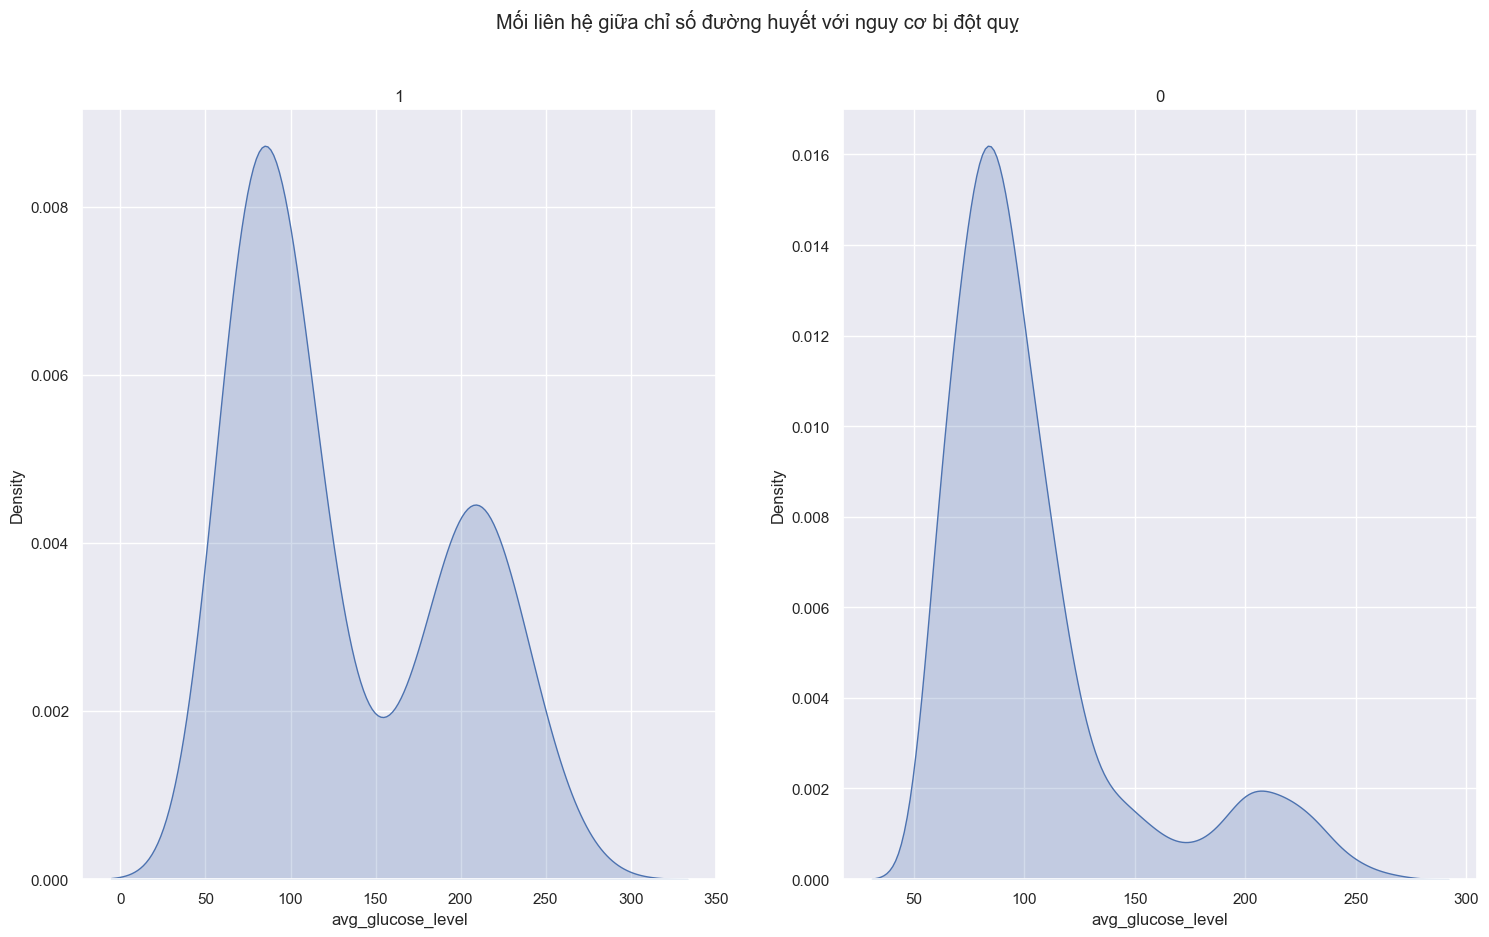

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Mối liên hệ giữa chỉ số đường huyết với nguy cơ bị đột quỵ')
stroke_df = patient_df.groupby(['stroke'])
stroke1_df = stroke_df.get_group(1)
stroke0_df = stroke_df.get_group(0)
sns.kdeplot(ax=axes[0],x = stroke1_df['avg_glucose_level'], fill=True).set_title('1')
sns.kdeplot(ax=axes[1],x = stroke0_df['avg_glucose_level'], fill=True).set_title('0')

- Nhận xét:
    - Biểu đồ cho thấy có mối quan hệ tương quan giữa mức đường huyết trung bình với tỷ lệ mắc bệnh đột quỵ, với những người bị đột quỵ có mức đường huyết trung bình cao hơn so với những người không bị đột quỵ
    - Hình dạng của các đường cong cũng gợi ý rằng có thể có hiệu ứng ngưỡng, với nguy cơ đột quỵ tăng mạnh trên một mức glucose nhất định.
    - Mối quan hệ này có thể được giải thích là do nồng độ glucose cao có thể làm hỏng các mạch máu và làm giảm lưu lượng máu đến não, làm tăng nguy cơ đột quỵ.

## **3. Finding correlations among multiple features**


### *3.1. Mối liên hệ giữa chỉ số BMI, độ tuổi của bệnh nhân với nguy cơ đột quỵ*

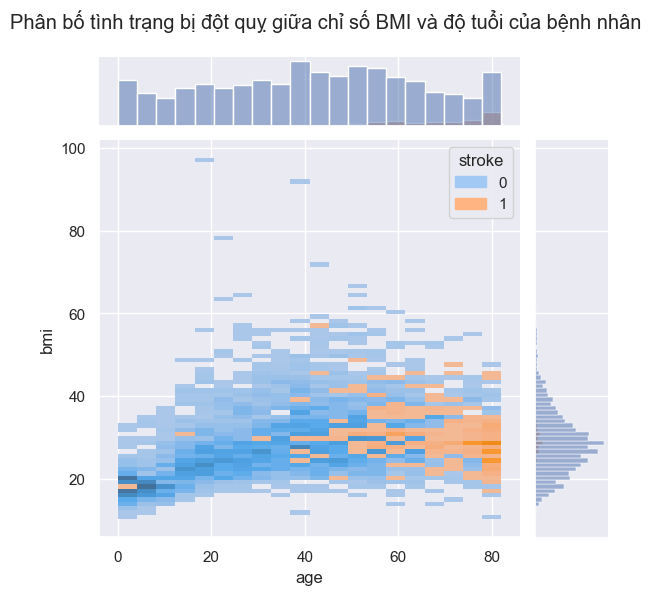

In [48]:
g = sns.jointplot(data = patient_df, x = 'age', y = 'bmi', hue = 'stroke', kind = 'hist', palette = 'pastel')
g.fig.suptitle("Phân bố tình trạng bị đột quỵ giữa chỉ số BMI và độ tuổi của bệnh nhân")
plt.subplots_adjust(top = 0.9, bottom = 0.1)
plt.show()

##### ***Liệu độ tuổi và chỉ số BMI có ảnh hưởng cùng lúc đến nguy cơ đột quỵ của bệnh nhân hay không?***
- Dựa vào cả hai yếu tố độ tuổi và BMI, số lượng người bị đột quỵ tập trung cao ở người có độ tuổi từ 50 trở lên và có chỉ số BMI trong khoảng từ 20 đến 40 kg/m^2, đặc biệt cao trong khoảng từ độ tuổi từ 70 đến 80 và chỉ số BMI từ 25 đến 30.
  - Nhìn theo độ tuổi, số lượng người bị đột quỵ xuất hiện càng nhiều ở các độ tuổi càng cao, khoảng từ 50 tuổi trở lên, tập trung cao ở độ tuổi 80.
  - Nhìn theo chỉ số BMI, số lượng người bị đột quỵ cũng xuất hiện càng nhiều ở những người có chỉ số BMI cao, từ trên 25 kg/m^2, tập trung cao nằm ở khoảng 30 kg/m^2.
- Như vậy, những người có vừa nằm trong độ tuổi cao, hơn 70 tuổi và có chỉ số BMI cao, trong khoảng từ 25 đến 30 kg/m^2 sẽ có khả năng bị đột quỵ cao nhất.

### *3.2. Mối liên hệ giữa môi trường sinh sống và tình trạng hôn nhân của bệnh nhân với nguy cơ đột quỵ*

Text(0.5, 0.01, 'Tỷ lệ người bị đột quỵ dựa trên nơi sinh sống và tình trạng hôn nhân')

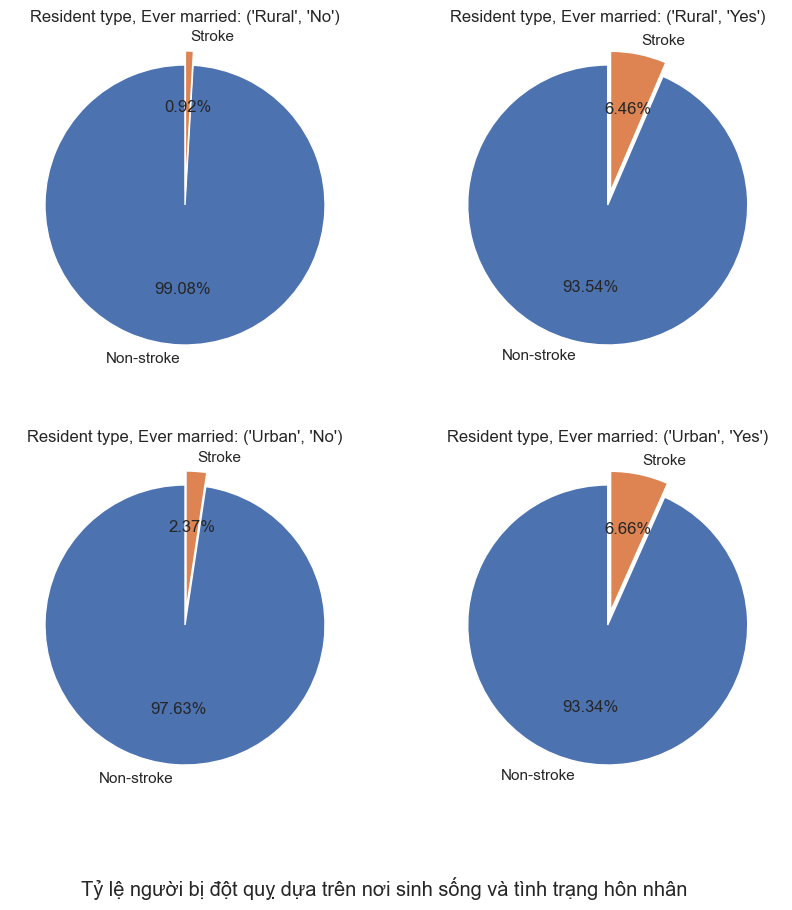

In [49]:
# tạo figure
RES_fig, axes = plt.subplots(2, 2, figsize = (10, 10))
explode = (0, 0.1)
labels = 'Non-stroke', 'Stroke'
colors = 'dodgerblue', 'sandybrown'

# gom nhóm bệnh nhân theo nơi sinh sống và tình trạng hôn nhân
g_rt_grp = patient_df.groupby(['Residence_type', 'ever_married'])

num = []
g_rt_arr = []

for i, key in zip(range(0, len(g_rt_grp.groups.keys())), g_rt_grp.groups.keys()):
    num.append(g_rt_grp.get_group(key)['stroke'].value_counts()) # số lượng bệnh nhân bị đột quỵ theo nhóm
    g_rt_arr.append(np.asarray(num[i]))
    # vẽ biểu đồ tròn cho từng trường hợp
    axes[i // 2, i % 2].pie(g_rt_arr[i], 
                           explode = explode, labels = labels, autopct = '%2.2f%%', startangle = 90)
    axes[i // 2, i % 2].set_title(f"Resident type, Ever married: {key}")

RES_fig.supxlabel('Tỷ lệ người bị đột quỵ dựa trên nơi sinh sống và tình trạng hôn nhân')

##### ***Môi trường sống và tình trạng hôn nhân ảnh hưởng như thế nào đến nguy cơ đột quỵ của bệnh nhân?***
- Quan sát biểu đồ trên:
  - Những bệnh nhân sinh sống ở môi trường nông thôn ('Rural') có tỉ lệ người bị đột quỵ thấp hơn so với những người ở môi trường đô thị ('Urban').
  - Những bệnh nhân có tình trạng hôn nhân là 'No' cũng có tỉ lệ người bị đột quỵ thấp hơn so với những người có tình trạng hôn nhân là 'Yes'.
  - Trường hợp có tỉ lệ xuất hiện những người bị đột quỵ thấp nhất là ('Rural', 'No'), chiếm 0.92%; kế đến là ('Urban', 'No') với tỉ lệ 2.37%. Ngược lại, trường hợp có tỉ lệ xuất hiện những người bị đột quỵ cao nhất là ('Urban', 'Yes'), có tỉ lệ là 6.66%, cao gấp 7.23 lần so với những người ở nông thôn và tình trạng hôn nhân là 'No'; kế đến là ('Rural', 'Yes') với tỉ lệ 6.46%.
- Như vậy, môi trường sống và tình trạng hôn nhân của bệnh nhân có ảnh hưởng rất lớn đến nguy cơ đột quỵ của bệnh nhân. Cụ thể là nếu bệnh nhân sinh sống ở nơi nông thôn và có tình trạng hôn nhân là 'No' thì họ sẽ có khả năng bị đột quỵ khá thấp. Ngược lại, nếu bệnh nhân sinh sống ở nơi đô thị và có tình trạng hôn nhân là 'Yes' thì họ sẽ có khả năng bị đột quỵ rất cao.

### 3.3. *Mối liên hệ giữa tình trạng hút thuốc, lượng đường huyết của bệnh nhân với nguy cơ đột quỵ*

Text(0.5, 1.0, 'Lượng đường huyết trung bình giữa những người bị đột quỵ và không bị đột quỵ theo tình trạng sử dụng thuốc lá')

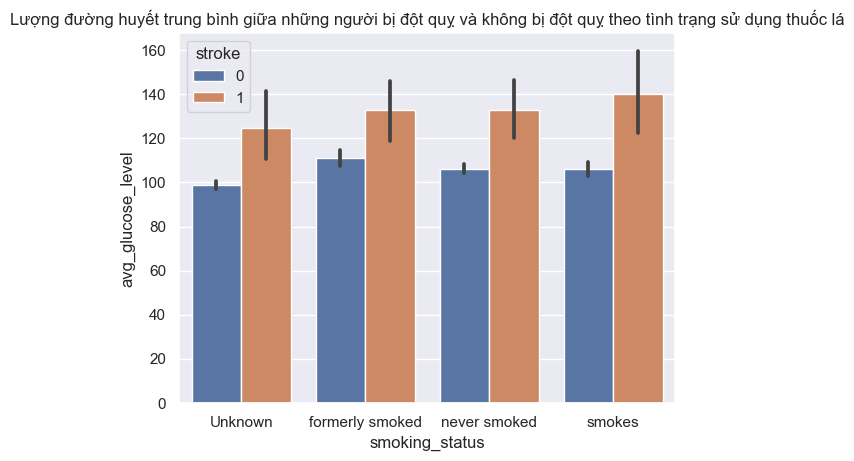

In [50]:
sns.barplot(data = patient_df, x = 'smoking_status', y = 'avg_glucose_level', hue = 'stroke', estimator =  np.mean).set_title('Lượng đường huyết trung bình giữa những người bị đột quỵ và không bị đột quỵ theo tình trạng sử dụng thuốc lá')

##### ***Liệu tình trạng hút thuốc, lượng đường huyết của bệnh nhân có ảnh hưởng trực tiếp đến nguy cơ đột quỵ của họ hay không?***
- Quan sát biểu đồ trên:
  - Những bệnh nhân không bị đột quỵ đa số đều có lượng đường huyết trung bình khá thấp, nằm trong khoảng từ 100 đến 110 mg/dL, bất kể tình trạng hút thuốc của họ.
  - Nhìn chung những bệnh nhân bị đột quỵ đa số đều có lượng đường huyết khá cao, nằm trong khoảng từ trên 120 đến 140 mg/dL. Đặc biệt đối với những người có tình trạng là smokes, tức là hiện tại họ vẫn đang hút thuốc, có lượng đường huyết cao nhất là 140 mg/dL.
- Như vậy, tình trạng hút thuốc, lượng đường huyết của bệnh nhân có ảnh hưởng đến nguy cơ đột quỵ của bệnh nhân. Cụ thể là nếu bệnh nhân có lượng đường huyết càng cao, trên 120 mg/dL thì họ sẽ có khả năng bị đột quỵ cao hơn, đặc biệt những người hiện tại đang hút thuốc sẽ có khả năng cao nhất.

### *3.4. Mối liên hệ giữa độ tuổi, bệnh cao huyết áp với nguy cơ đột quỵ*

Text(0.5, 1.0, 'Độ tuổi trung bình giữa những người bị đột quỵ và không bị đột quỵ theo trình trạng bệnh cao huyết áp')

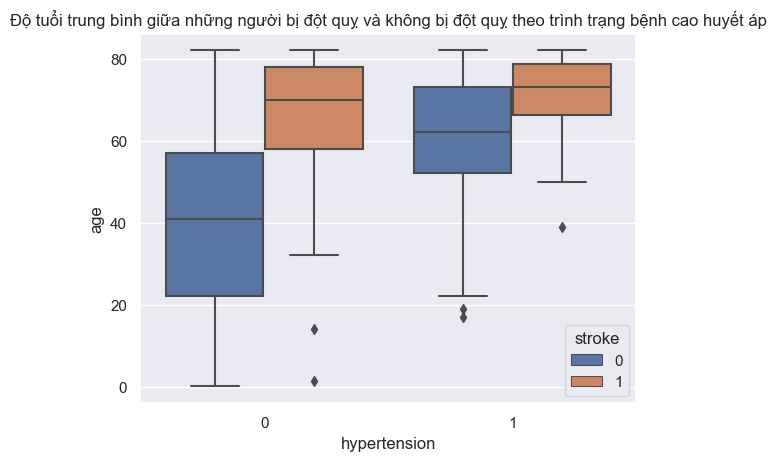

In [51]:
sns.boxplot(data = patient_df, x = 'hypertension', y = 'age', hue = 'stroke').set_title('Độ tuổi trung bình giữa những người bị đột quỵ và không bị đột quỵ theo trình trạng bệnh cao huyết áp')

##### ***Liệu độ tuổi, tình trạng bệnh cao huyết áp của bệnh nhân có ảnh hưởng trực tiếp đến nguy cơ đột quỵ của họ hay không?***
- Quan sát biểu đồ trên:
  - Những bệnh nhân không bị cao huyết áp và không bị đột quỵ có độ tuổi trung bình khá thấp, nằm trong khoảng 40 tuổi.
  - Những bệnh nhân bị cao huyết áp những không bị đột quỵ có độ tuổi trung bình khoảng hơn 60.
  - Với những bệnh nhân bị đột quỵ đều có độ tuổi trung bình khá cao, hơn 70 tuổi, đặc biệt là những người có bệnh cao huyết áp có độ tuổi trung bình cao nhất, khoảng 75 tuổi.
- Như vậy, độ tuổi, tình trạng bệnh cao huyết áp của bệnh nhân có ảnh hưởng đến nguy cơ đột quỵ của bệnh nhân. Cụ thể là nếu bệnh nhân có độ tuổi càng cao, khoảng hơn 70 tuổi thì họ sẽ có khả năng bị đột quỵ cao hơn, đặc biệt những người có bệnh cao huyết áp sẽ có khả năng cao nhất.

### *3.5. Mối liên hệ giữa tình trạng hôn nhân, chỉ số BMI với nguy cơ đột quỵ*

Text(0.5, 1.0, 'Sự phân bố tình trạng bị đột quỵ và không bị đột quỵ theo chỉ số BMI và tình trạng hôn nhân')

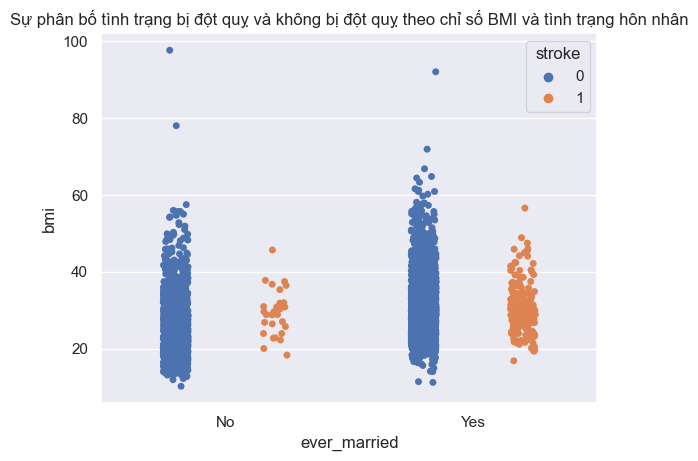

In [52]:
sns.stripplot(data = patient_df, x = 'ever_married', y = 'bmi', hue = 'stroke', dodge = True).set_title('Sự phân bố tình trạng bị đột quỵ và không bị đột quỵ theo chỉ số BMI và tình trạng hôn nhân')

##### ***Liệu tình trạng hôn nhân và chỉ số BMI của bệnh nhân có ảnh hưởng trực tiếp đến nguy cơ đột quỵ của họ hay không?***
- Quan sát biểu đồ trên:
  - Chỉ số BMI ở các trường hợp bị đột quỵ nằm trong khoảng từ 20 đến 40 kg/m^2, đặc biệt tập trung cao ở khoảng từ 25 đến 30 kg/m^2 ở những bệnh nhân có tình trạng hôn nhân là 'Yes'.
  - Phần lớn những trường hợp bị đột quỵ xuất hiện ở những bệnh nhân có tình trạng hôn nhân là 'Yes', một trong những lý do có thể là vì đó là tình trạng hôn nhân chiếm đa số trong toàn bộ dữ liệu.
    - (Kết hợp dữ liệu ở phần **3.1.7. `Ever married`**) Theo tính toán thì người có tình trạng hôn nhân là 'Yes' có tỉ lệ bị đột quỵ cao gấp 4 lần những người có tình trạng hôn nhân là 'No'. 
- Như vậy, tình trạng hôn nhân và chỉ số BMI của bệnh nhân có ảnh hưởng đến nguy cơ đột quỵ của họ. Đặc biệt là đối với những người có tình trạng hôn nhân là 'Yes' và chỉ số BMI cao, nằm trong khoảng từ 25 đến 30 kg/m^2, họ sẽ có nguy cơ bị đột quỵ so với những người tình trạng hôn nhân là 'No'.

## **4. Maching Learning**

### *4.1. Chọn thuộc tính để chuẩn bị train mô hình*

In [53]:
num_features = ['age', 'avg_glucose_level', 'bmi']
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']

features = num_features + cat_features
print(features)

['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']


In [54]:
X = patient_df[features]
y = patient_df['stroke']

In [55]:
X.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,smoking_status
id,,,,,,,,
9046,67.0,228.69,36.6,Male,0,1,Yes,formerly smoked
51676,61.0,202.21,30.4,Female,0,0,Yes,never smoked
31112,80.0,105.92,32.5,Male,0,1,Yes,never smoked
60182,49.0,171.23,34.4,Female,0,0,Yes,smokes
1665,79.0,174.12,24.0,Female,1,0,Yes,never smoked


In [56]:
y.head()

id
9046     1
51676    1
31112    1
60182    1
1665     1
Name: stroke, dtype: category
Categories (2, int64): [0, 1]

### *4.2 Chia dữ liệu từ dataset ban đầu để train*
* X -> X_train chiếm `80%` và X_test chiếm `10%`

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [58]:
X_train.shape, X_test.shape

((4088, 8), (1022, 8))

### *4.3 Train mô hình*

* Một số thư kiện sklearn giúp ta pre-proccessing

In [59]:
#preprocess pipeline 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [60]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [61]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'hypertension', 'heart_disease',
                                  'ever_married', 'smoking_status'])])

In [62]:
X_train = preprocessor.transform(X_train)

In [63]:
X_test = preprocessor.transform(X_test)

* Lưu ý: Mình không train hết 80% trên X_train đã split ở dataset.
* Chia X_train trên thành `80%` X_train và `20%` X_valid. X_valid t dùng để kiểm chứng mô hình mà mình đã train.
* Tương tự, ta cũng split y_train.

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.2)

In [65]:
X_train.shape, X_val.shape

((3270, 16), (818, 16))

In [66]:
X_test.shape

(1022, 16)

* `X_train, X_valid, X_test`
* `y_train, y_valid, y_test`

* Áp dụng cây quyết định phân loại vì chúng ta đang theo hướng từ thông tin của một bệnh nhân cho ra người đó có bị đột quỵ hay không? Vận dụng lý thuyết cây quyết định đã học ở môn Cơ sở trí tuệ nhân tạo.

In [67]:
#binary classification

# sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [68]:
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=2022)

#### `Bước 2: Validation Data`

In [69]:
decision_tree.score(X_val, y_val)

0.9474327628361858

In [70]:
y_pred = decision_tree.predict(X_val)

In [71]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.0, 0.0)

In [72]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       779
           1       0.00      0.00      0.00        39

    accuracy                           0.95       818
   macro avg       0.48      0.50      0.49       818
weighted avg       0.91      0.95      0.93       818



`Phân tích report:`
* Lớp người không bị đột quỵ với mô hình dự đoán rất tốt
* Tuy nhiên với lớp người không bị đột quỵ thì độ chỉnh xác chỉ có 38%. Vì thế, mô hình mà ta xây dựng chưa được tốt về lớp người bị bệnh đột quỵ.

#### `Bước 3: Test Data`

In [73]:
y_test_preds = decision_tree.predict(X_test)

In [74]:
pd.DataFrame({'y': y_test, 'y_preds': y_test_preds})

,y,y_preds
id,,
61960,1,0
31741,0,0
59451,0,0
40670,0,0
25391,0,0
...,...,...
2953,0,0
47799,0,0
61013,0,0
